In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people()

In [3]:
x = lfw_people.data
y = lfw_people.target

In [4]:
x.shape, y.shape

((13233, 2914), (13233,))

In [5]:
n_samples, h, w =  lfw_people.images.shape
n_samples, h, w

(13233, 62, 47)

In [6]:
lfw_people.target_names

array(['AJ Cook', 'AJ Lamas', 'Aaron Eckhart', ..., 'Zumrati Juma',
       'Zurab Tsereteli', 'Zydrunas Ilgauskas'], dtype='<U35')

In [7]:
def plot_faces(data, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.xticks(())
        plt.yticks(())
        plt.imshow(data[i].reshape((h, w)), cmap=plt.cm.gray)
    plt.show()

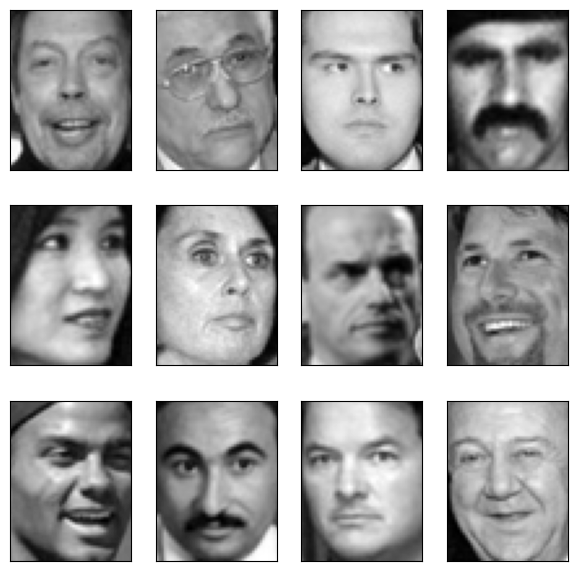

In [8]:
plot_faces(x, h, w)

## 处理数据集

In [9]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [10]:
x = lfw_people.data
y = lfw_people.target

In [11]:
x.shape, y.shape

((1288, 1850), (1288,))

In [12]:
n_samples, h, w =  lfw_people.images.shape
n_samples, h, w

(1288, 50, 37)

In [13]:
lfw_people.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=42)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [16]:
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [17]:
x_train.shape, x_test.shape

((966, 1850), (322, 1850))

## PCA

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=150, random_state=42)

In [19]:
pca.fit(x_train)

PCA(n_components=150, random_state=42)

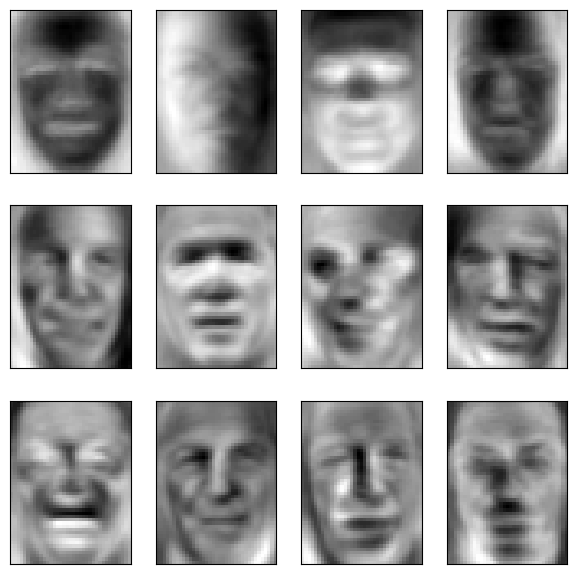

In [20]:
plot_faces(pca.components_, h, w)

In [21]:
from sklearn.svm import SVC

In [22]:
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

In [23]:
clf = SVC(C = 10)
clf.fit(x_train_pca, y_train)
clf.score(x_test_pca, y_test)

0.8322981366459627

In [24]:
clf = SVC(C = 10)
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.8229813664596274